In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df=pd.read_csv('final.csv')

In [3]:
df

,year,cpi
0,1960-01-01,1.779878
1,1960-02-01,1.772822
2,1960-03-01,1.765767
3,1960-04-01,1.758712
4,1960-05-01,1.751656
...,...,...
716,2019-09-01,5.656717
717,2019-10-01,5.898397
718,2019-11-01,6.140077
719,2019-12-01,6.381757


In [4]:
df.set_index('year',inplace=True)

In [5]:
df

,cpi
year,
1960-01-01,1.779878
1960-02-01,1.772822
1960-03-01,1.765767
1960-04-01,1.758712
1960-05-01,1.751656
...,...
2019-09-01,5.656717
2019-10-01,5.898397
2019-11-01,6.140077


In [6]:
# separate out a validation dataset
split_point = len(df) - 100
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 621, Validation 100


In [7]:
print(df.shape)
train=df.iloc[:-100]
test=df.iloc[-100:]
print(df.shape,test.shape)

(721, 1)
(721, 1) (100, 1)


In [8]:
#base model
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [9]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=7.936, Expected=8.201
>Predicted=8.201, Expected=8.465
>Predicted=8.465, Expected=8.730
>Predicted=8.730, Expected=8.736
>Predicted=8.736, Expected=8.742
>Predicted=8.742, Expected=8.748
>Predicted=8.748, Expected=8.754
>Predicted=8.754, Expected=8.759
>Predicted=8.759, Expected=8.765
>Predicted=8.765, Expected=8.771
>Predicted=8.771, Expected=8.777
>Predicted=8.777, Expected=8.783
>Predicted=8.783, Expected=8.789
>Predicted=8.789, Expected=8.795
>Predicted=8.795, Expected=8.801
>Predicted=8.801, Expected=8.850
>Predicted=8.850, Expected=8.898
>Predicted=8.898, Expected=8.947
>Predicted=8.947, Expected=8.995
>Predicted=8.995, Expected=9.044
>Predicted=9.044, Expected=9.092
>Predicted=9.092, Expected=9.141
>Predicted=9.141, Expected=9.189
>Predicted=9.189, Expected=9.238
>Predicted=9.238, Expected=9.286
>Predicted=9.286, Expected=9.335
>Predicted=9.335, Expected=9.383
>Predicted=9.383, Expected=9.191
>Predicted=9.191, Expected=8.999
>Predicted=8.999, Expected=8.806
>Predicted

In [10]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [11]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [12]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


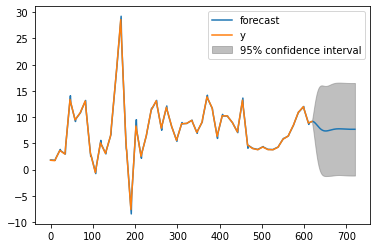

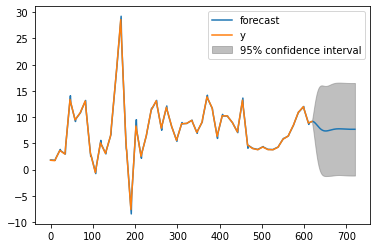

In [13]:
# fit model
model = ARIMA(X, order=(2,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=100)[0]
model_fit.plot_predict(1, 721)

In [14]:
# prepare data
X = df.values
X = X.astype('float32')

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


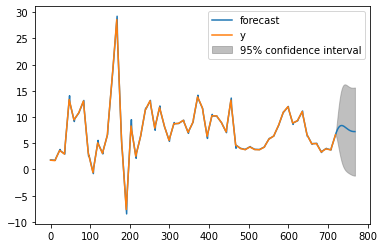

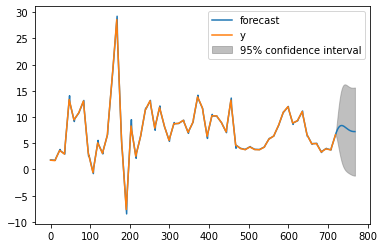

In [15]:
# fit model
model = ARIMA(X, order=(2,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=48)[0]
model_fit.plot_predict(1, 769)

In [16]:
# Result of next 48 months
forecast

array([6.85239133, 7.06731079, 7.26706648, 7.45079956, 7.61790647,
       7.76802274, 7.90100556, 8.01691542, 8.11599722, 8.19866097,
       8.26546238, 8.31708361, 8.35431433, 8.37803327, 8.38919045,
       8.38879023, 8.37787524, 8.35751138, 8.32877384, 8.29273433,
       8.25044949, 8.20295047, 8.15123377, 8.09625328, 8.03891347,
       7.98006382, 7.92049427, 7.86093181, 7.80203806, 7.74440775,
       7.68856816, 7.63497928, 7.58403475, 7.53606348, 7.49133173,
       7.45004587, 7.41235539, 7.37835638, 7.34809526, 7.32157272,
       7.29874782, 7.27954218, 7.26384423, 7.25151341, 7.24238436,
       7.23627098, 7.23297033, 7.23226645])

In [17]:
pickle.dump(model,open('infliation.pkl','wb'))

In [18]:
model = pickle.load(open('infliation.pkl','rb'))